<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-7-hotel-booking-demand?scriptVersionId=255382684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Interpretation of Hotel Booking Demand Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


-> To begin the analysis, we import the essential Python libraries:

pandas for data manipulation and analysis.

numpy for numerical operations.

matplotlib.pyplot for visualizing the data.

In [2]:
import matplotlib.pyplot as plt

-> We load the Hotel_bookings dataset using pandas.read_csv(), which reads the data from the provided file path and stores it in a DataFrame named df
-> We print the number of rows and columns in the dataset using df.shape to understand the dataset's overall size.

In [3]:
df=pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df=pd.DataFrame(df)
df.shape


(119390, 32)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Cleaning


In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

By isnull and info functions we see country has 488 and agent has 16340 and company has 112593 empty values 

In [6]:
df['children'].value_counts()


children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

Filling empty values in children with 0

In [7]:
df['children']=df['children'].fillna(0)

In [8]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

Filling empty values in country with Unknown

In [9]:
df['country']=df['country'].fillna('Unknown')

Filling Empty values in Agent with 0

In [10]:
df['agent'] = df['agent'].fillna(0)

We are dropping company column because almost all column is empty

In [11]:
df = df.drop('company',axis=1)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Data has no empty values now 


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Combining Arrival_date_year arrival_date_month and Arrival_date_Day_of_month to get datecolumn

In [14]:
# Combine year, month, and day into a datetime column
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)


Checking if we merged correctly

In [15]:
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']].head()


,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-01
3,2015,July,1,2015-07-01
4,2015,July,1,2015-07-01


In [16]:
print(df['arrival_date'].dtype)

datetime64[ns]


Dropping Arrival_date_year arrival_date_month and Arrival_date_Day_of_month to reduce size of Df

In [17]:
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)


In [18]:
df['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

Changing reservation_status_date type from object to date


In [19]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119390 non-null  float64       
 8   babies                          119390 non-null  int64         
 9   meal                            119390 non-null  object        
 10  country                         119390 non-null  object 

Now we can see Data is clean

# EDA

In [21]:
df.describe()


,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407360,2016-08-28 16:39:45.727447808
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,2015-07-01 00:00:00
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00,2016-03-13 00:00:00
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00,2016-09-06 00:00:00
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00,2017-03-18 00:00:00
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,2017-08-31 00:00:00
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798,NaN,NaN


**Notes**- Dataset contains 119,390 hotel bookings from 2015 to 2017.
- Around 37% of bookings were cancelled; average lead time was ~104 days.
- Most guests booked for 2 adults with 0–1 special requests.

**Some Important Aggregations**

In [22]:
print("Average ADR:", df['adr'].mean())
print("Total bookings:", len(df))
print("Range of lead_time:", df['lead_time'].max() - df['lead_time'].min())


Average ADR: 101.83112153446687
Total bookings: 119390
Range of lead_time: 737


**Distribution of Lead Time**

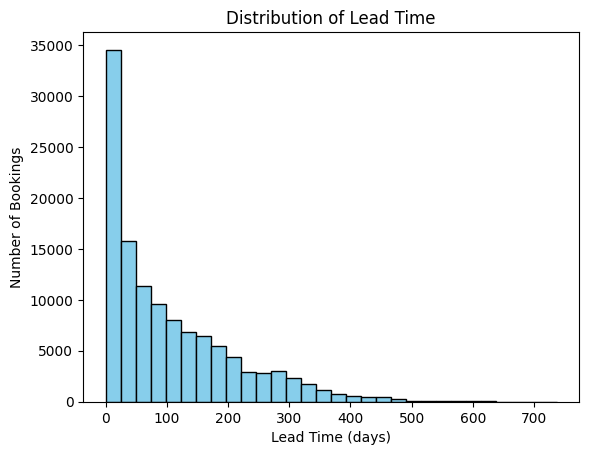

In [23]:


plt.hist(df['lead_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.show()


The distribution is right-skewed, meaning:

Most bookings occur with short lead times (0–50 days).

Fewer bookings happen with very long lead times (e.g., >300 days).

The peak (mode) is at 0–20 days, with around 35,000 bookings in that range.

There are very few bookings beyond 400 days, but they do exist.

**Pie Chart - Distribution of Hotel Booking Type**

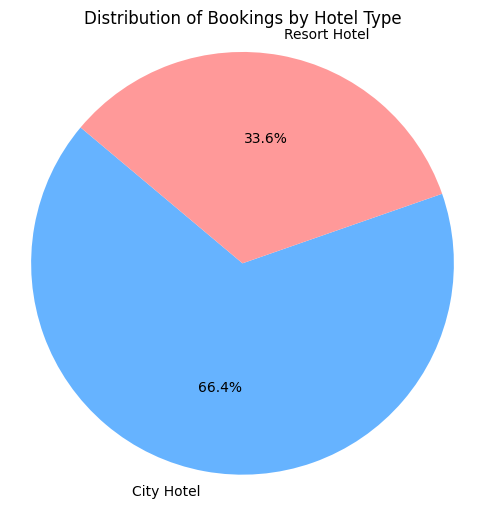

In [24]:
hotel_counts = df['hotel'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title("Distribution of Bookings by Hotel Type")
plt.axis('equal')  # Ensures pie chart is circular
plt.show()


**Notes**: The histogram shows that most bookings are made with a short lead time (0–50 days).  
Booking frequency decreases significantly as lead time increases beyond 100 days.


**Hotel Bookings by Month and Year**

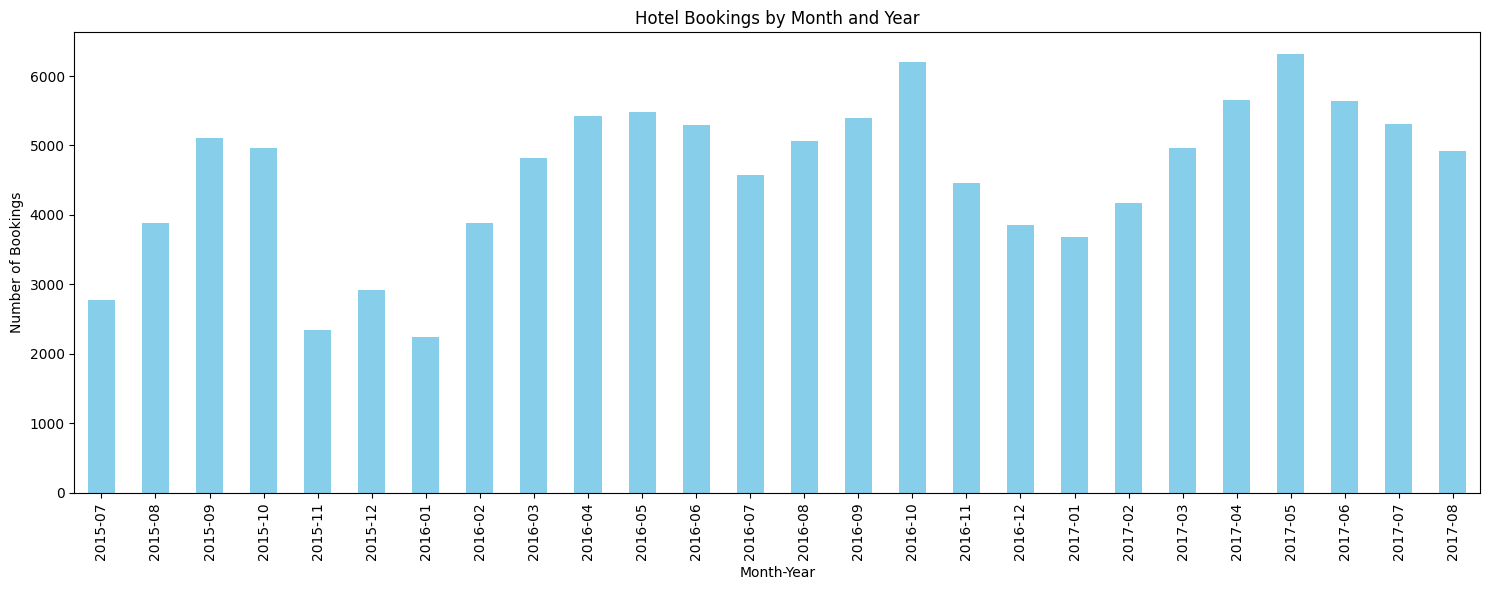

In [25]:
# Extract month and year from arrival_date
df['arrival_month_year'] = df['arrival_date'].dt.to_period('M')

# Count bookings by each month-year
monthly_bookings = df['arrival_month_year'].value_counts().sort_index()

# Plotting


plt.figure(figsize=(15,6))
monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Hotel Bookings by Month and Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Notes**: Hotel bookings show seasonal peaks, with the highest volumes typically in mid-year months like August.  
There is a noticeable dip in bookings during winter months such as December and January across all years.


**Top 10 COuntries by No of Guests**

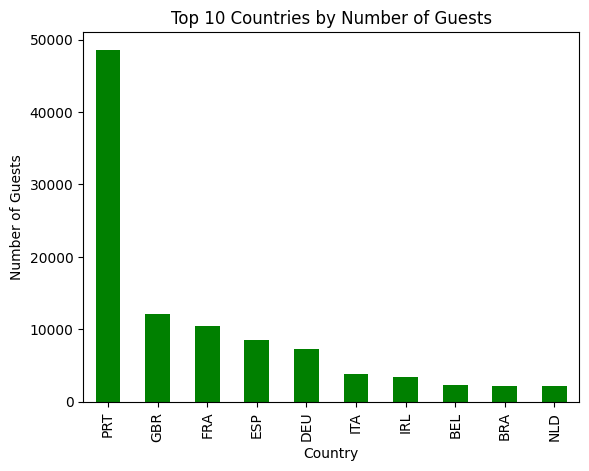

In [26]:
df['country'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Countries by Number of Guests")
plt.xlabel("Country")
plt.ylabel("Number of Guests")
plt.show()


**Notes**: Portugal (PRT) accounts for the highest number of guests by a large margin, far exceeding other countries.  
The UK (GBR), France (FRA), and Spain (ESP) follow, with guest numbers gradually decreasing among the top 10.


**Comparision of Cancellation Rate: Repeat vs Non-Repeat Guests**

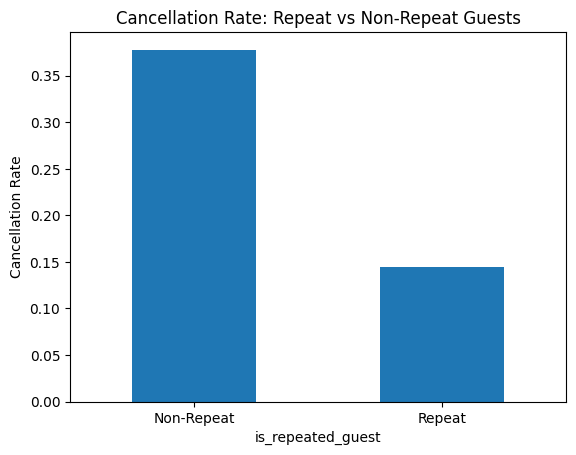

In [27]:
repeat_vs_cancel = df.groupby('is_repeated_guest')['is_canceled'].mean()
repeat_vs_cancel.plot(kind='bar')
plt.title("Cancellation Rate: Repeat vs Non-Repeat Guests")
plt.xticks([0, 1], ['Non-Repeat', 'Repeat'], rotation=0)
plt.ylabel("Cancellation Rate")
plt.show()


**Notes**: Non-Repeat Customers tend to cancel more

**"Average ADR by Customer Type"**

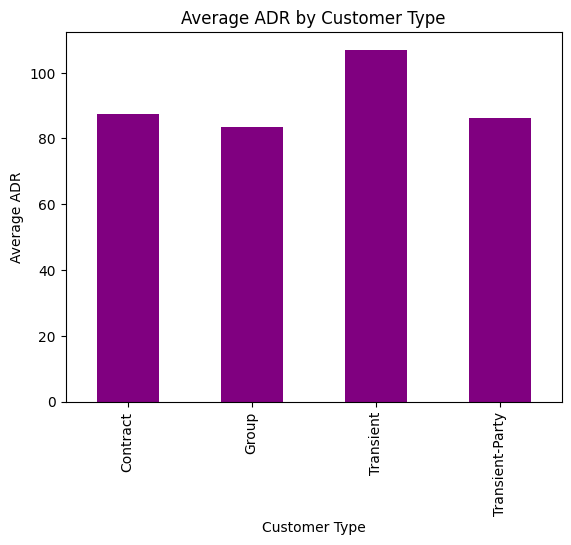

In [28]:
df.groupby('customer_type')['adr'].mean().plot(kind='bar', color='purple')
plt.title("Average ADR by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average ADR")
plt.show()


Transient customers have the highest Average Daily Rate (ADR), exceeding all other customer types.  
Group customers have the lowest ADR, while Contract and Transient-Party types fall in the mid-range.


**Booking Cancellation Distribution**

Cancellation rate: 37.04%


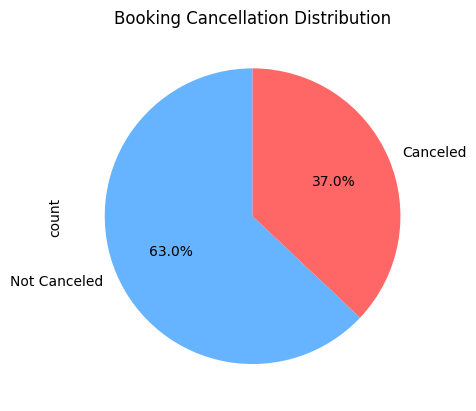

In [29]:

cancel_rate = df['is_canceled'].mean() * 100
print(f"Cancellation rate: {cancel_rate:.2f}%")


df['is_canceled'].value_counts().plot.pie(labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
plt.title('Booking Cancellation Distribution')
plt.show()

**What is the average Stay in weekend nights and week nights**

In [30]:
avg_weekend_nights = df['stays_in_weekend_nights'].mean()
avg_week_nights = df['stays_in_week_nights'].mean()

print(f"Average weekend nights: {avg_weekend_nights:.2f}")
print(f"Average week nights: {avg_week_nights:.2f}")


Average weekend nights: 0.93
Average week nights: 2.50


**Which meal types are popular**

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64


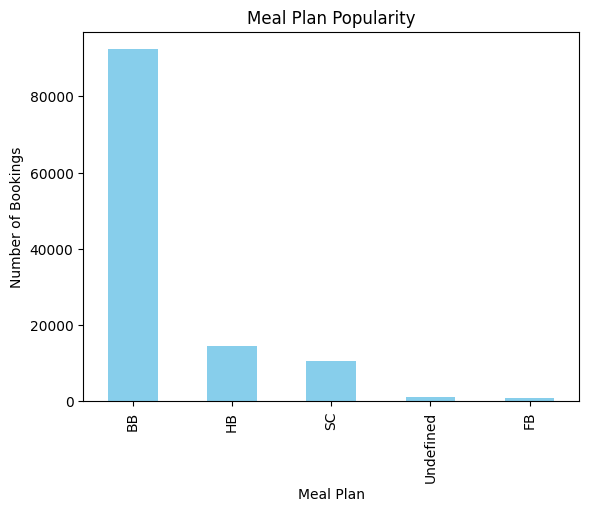

In [31]:
meal_counts = df['meal'].value_counts()
print(meal_counts)

# Bar plot
meal_counts.plot(kind='bar', color='skyblue')
plt.title('Meal Plan Popularity')
plt.xlabel('Meal Plan')
plt.ylabel('Number of Bookings')
plt.show()

The BB (Bed & Breakfast) meal plan is by far the most popular, with the highest number of bookings.  
Other meal plans like HB (Half Board) and SC (Self Catering) are significantly less common, with FB (Full Board) being the least chosen.


**what is the percentage of Repeated Guests**

hotel
Resort Hotel    0.044383
City Hotel      0.025615
Name: is_repeated_guest, dtype: float64


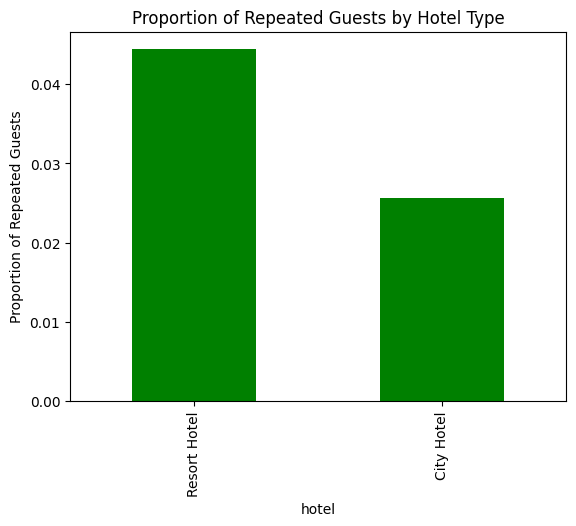

In [32]:
repeated_ratio = df.groupby('hotel')['is_repeated_guest'].mean().sort_values(ascending=False)
print(repeated_ratio)

# Bar plot
repeated_ratio.plot(kind='bar', color='green')
plt.title('Proportion of Repeated Guests by Hotel Type')
plt.ylabel('Proportion of Repeated Guests')
plt.show()


**Notes**: Resort hotel has more repeated guests than city hotel

**what is room type mismatch rate**

In [33]:
room_mismatch = (df['reserved_room_type'] != df['assigned_room_type']).mean() * 100
print(f"Room type mismatch rate: {room_mismatch:.2f}%")


Room type mismatch rate: 12.49%


**what is the average waiting list**

In [34]:
avg_waiting_days = df['days_in_waiting_list'].mean()
print(f"Average days in waiting list: {avg_waiting_days:.2f}")


Average days in waiting list: 2.32


**what is the Average gap between reservation status date and arrival date**

In [35]:
date_diff = (df['arrival_date'] - df['reservation_status_date']).dt.days
avg_gap = date_diff.mean()
print(f"Average gap between reservation status date and arrival date: {avg_gap:.2f} days")


Average gap between reservation status date and arrival date: 29.68 days


**Count how many bookings require car parking spaces**

Number of bookings by required car parking spaces:
required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64


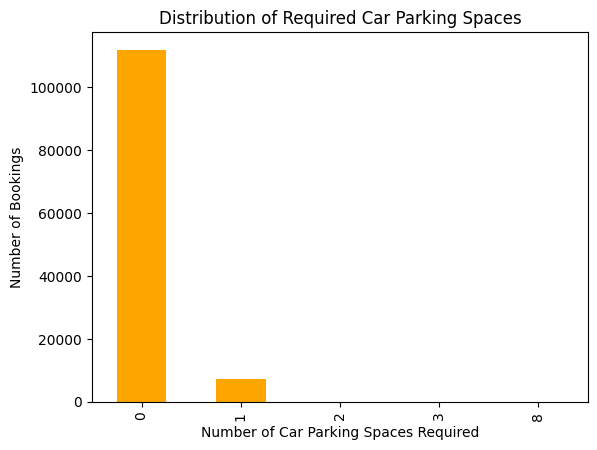

In [36]:


parking_counts = df['required_car_parking_spaces'].value_counts().sort_index()

print("Number of bookings by required car parking spaces:")
print(parking_counts)

# Bar plot to visualize distribution
parking_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Required Car Parking Spaces')
plt.xlabel('Number of Car Parking Spaces Required')
plt.ylabel('Number of Bookings')
plt.show()


**Notes**: Most people dont require car parking space 


# Summary 
The dataset contains 119,390 hotel bookings from 2015 to 2017 across city and resort hotels.

About 37% of bookings were cancelled, with an average lead time of 104 days and a right-skewed distribution.

Most guests booked for 2 adults, stayed 2–3 nights, and made 0–1 special requests.

Portugal had the highest number of guests, followed by UK, France, and Spain.

Transient customers had the highest ADR, while Group bookings had the lowest.

Room type mismatches occurred in ~12.5% cases, and most people didn't request parking.




High cancellation rate (37%) suggests uncertainty in customer commitment, possibly due to flexible booking policies.

Room mismatches and special requests are relatively low, showing operational efficiency in room allocation.